# Project Context:

The objective of this project. We will build a classifier that will determine if a certain mushroom is edible or poisonous.

Data Location: 
<a href= "https://archive.ics.uci.edu/ml/datasets/mushroom">Click_Here</a>

dataset courtesy UCI Machine Learning repository

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


%matplotlib inline


# Importing data

In [8]:
DATAPATH ="/content/sample_data/mushrooms.csv"

data = pd.read_csv(DATAPATH)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#Exploratory Data Analysis (EDA)

In [10]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


####  1. Checking if the dataset is unbalanced or not. 

In [11]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

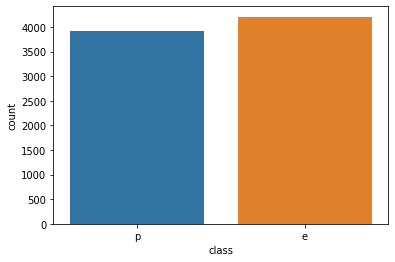

In [9]:
x = data['class']

ax = sns.countplot(x = x, data=data)

* It looks like a fairly balanced data set with an almost equal number of poisonous and edible mushrooms.

####2.  Our target variable is class, we want to see how each feature affects the target

In [13]:
def plot_data(hue,data):
  for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.set(rc={'figure.figsize':(11.7, 8.27)})
    ax = sns.countplot(x=data[col], hue=hue, data=data)

The hue will give a color code to the poisonous and edible class. The data parameter will contain all features but the mushroom’s class.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


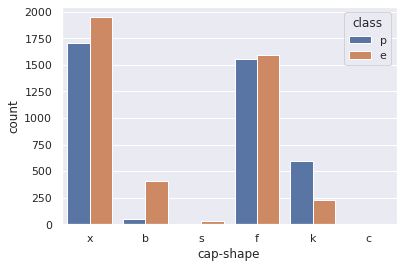

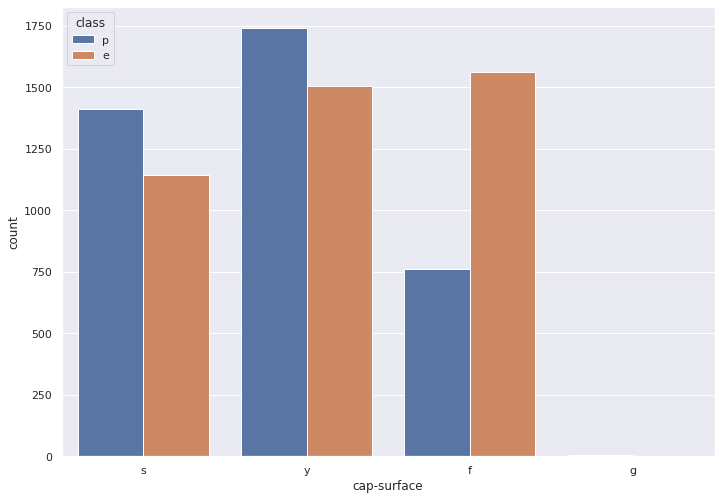

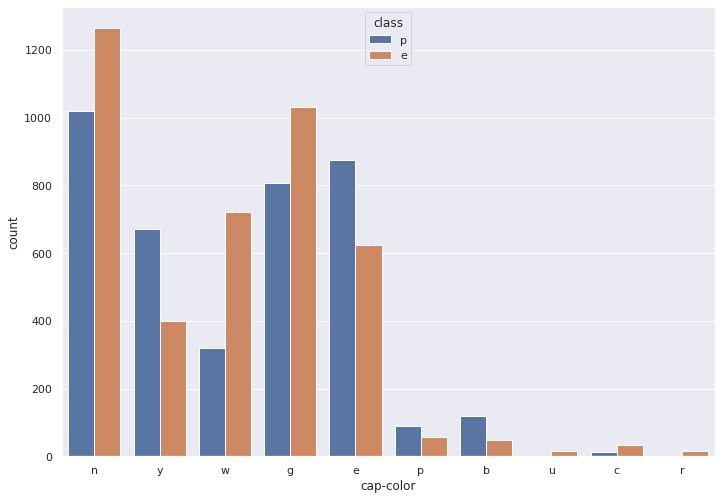

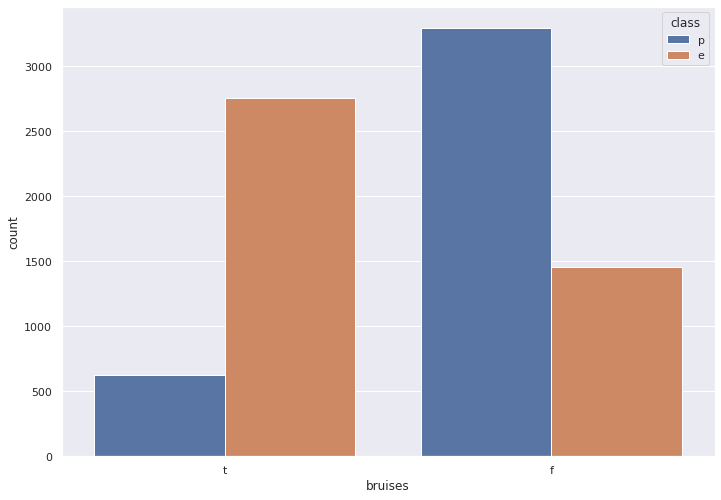

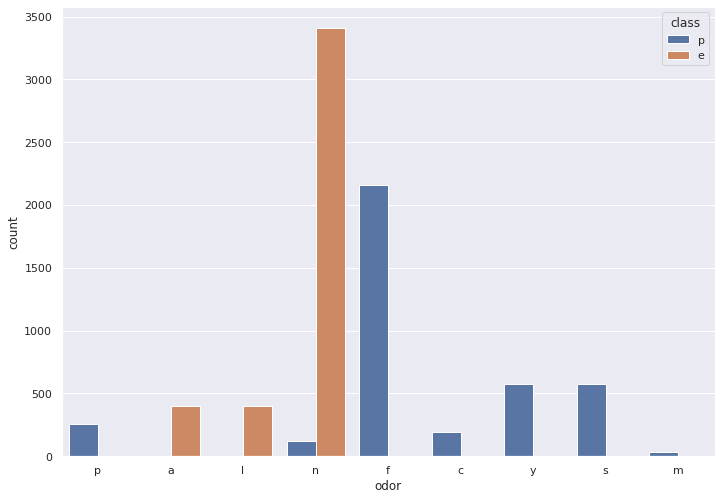

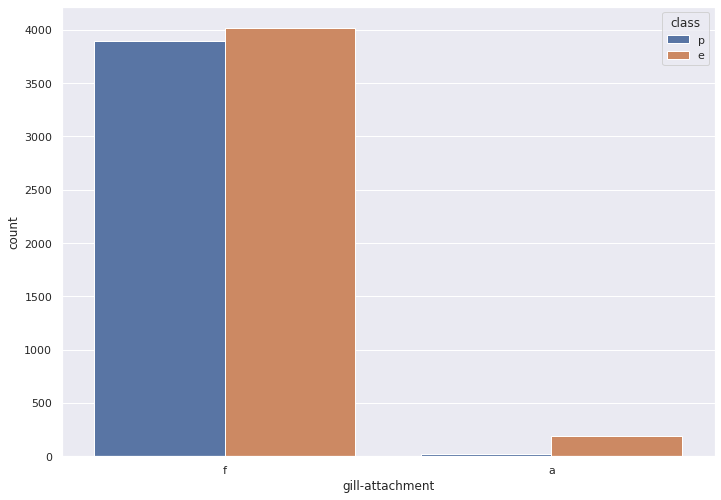

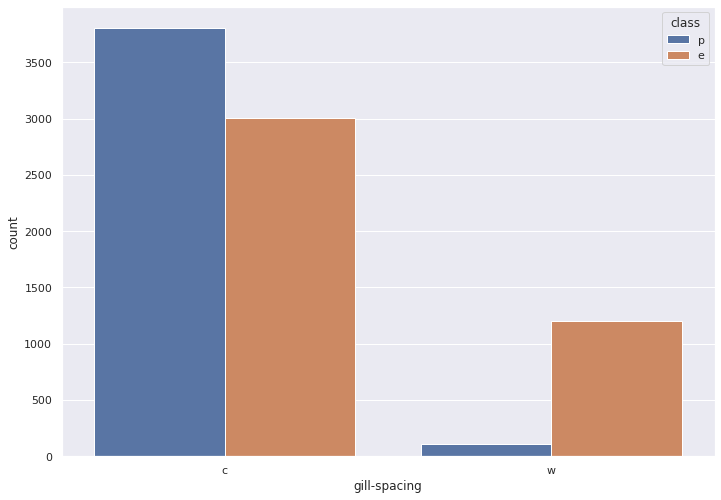

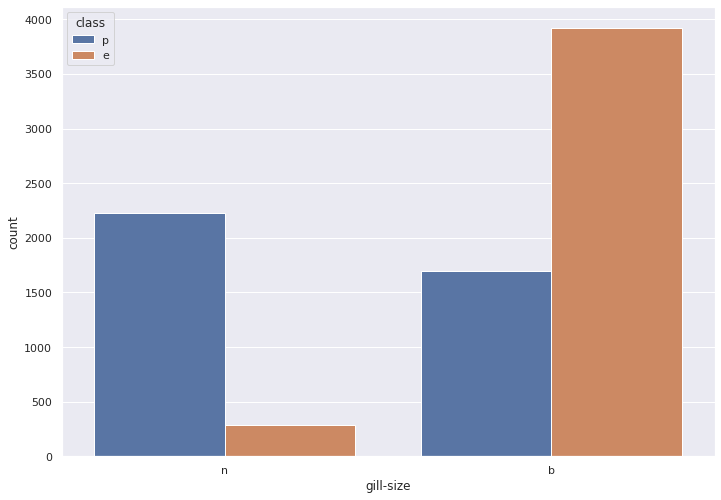

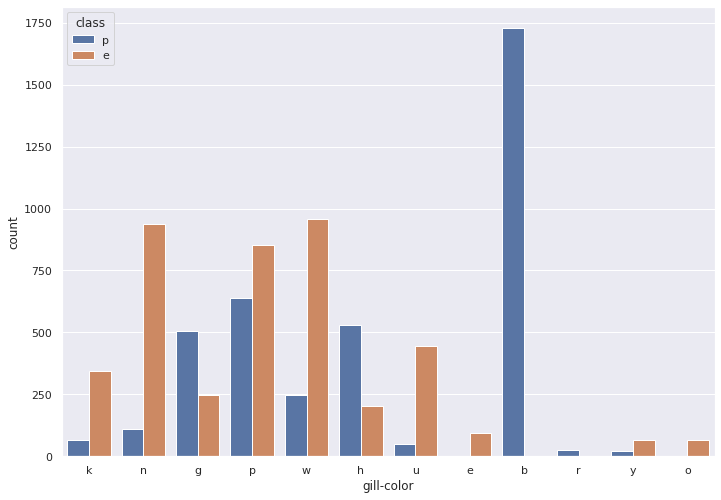

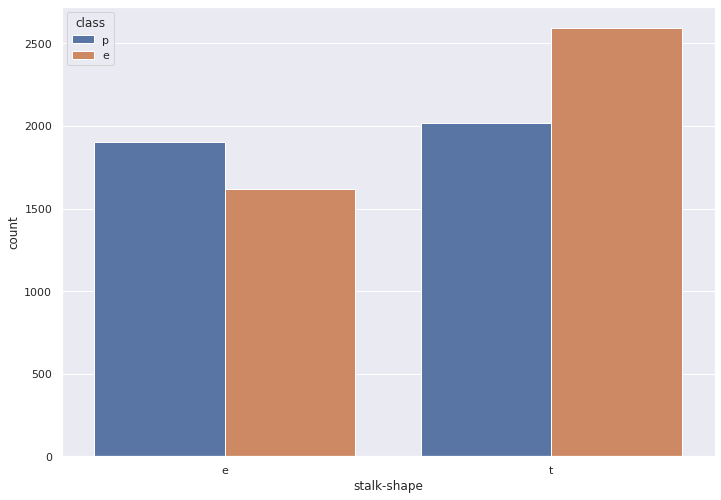

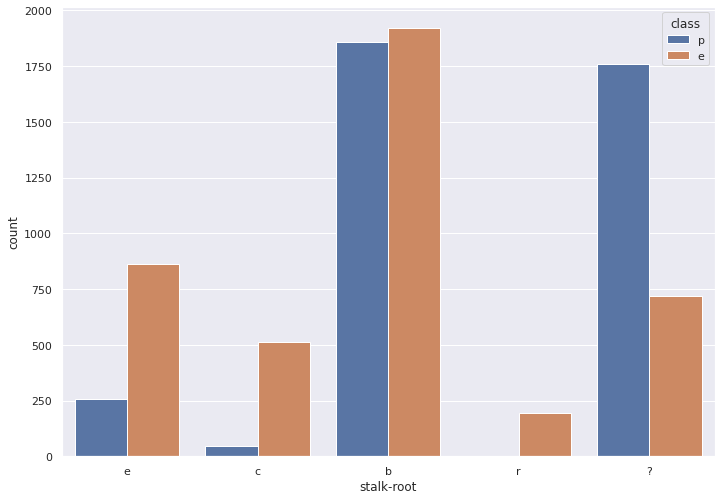

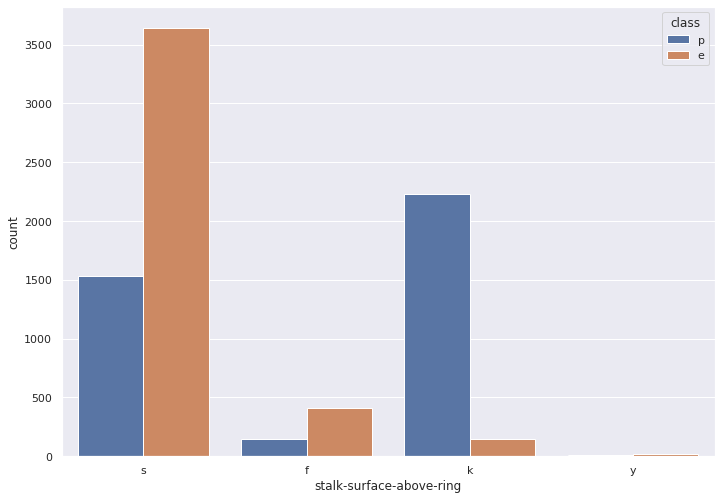

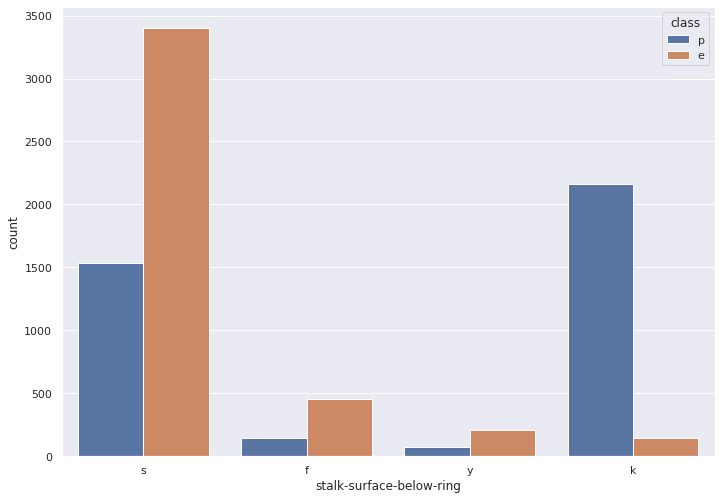

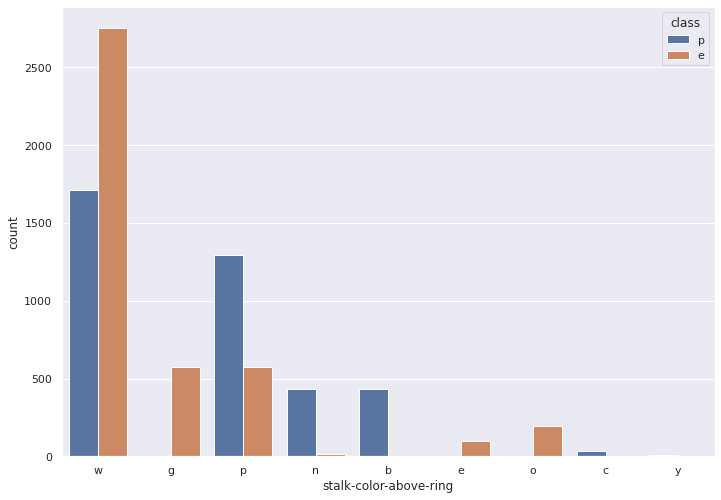

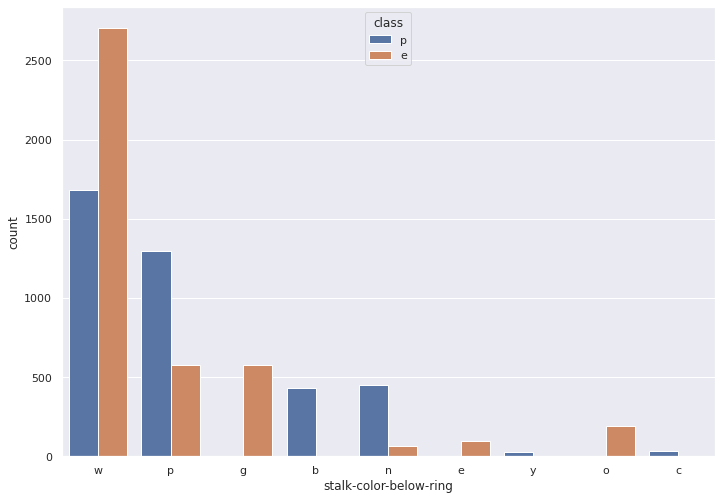

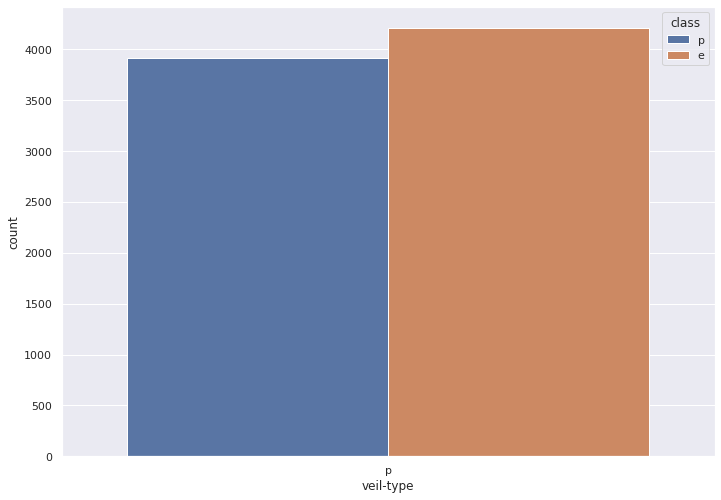

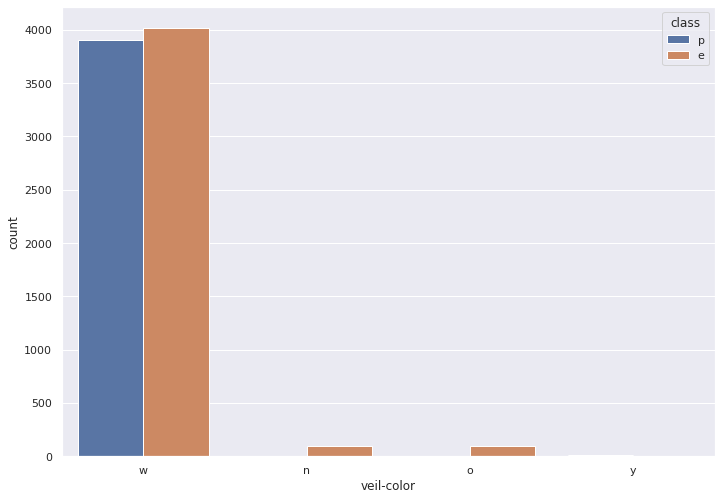

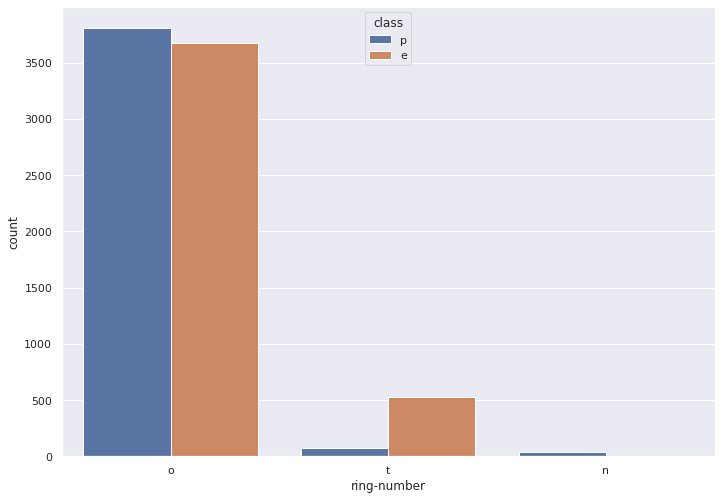

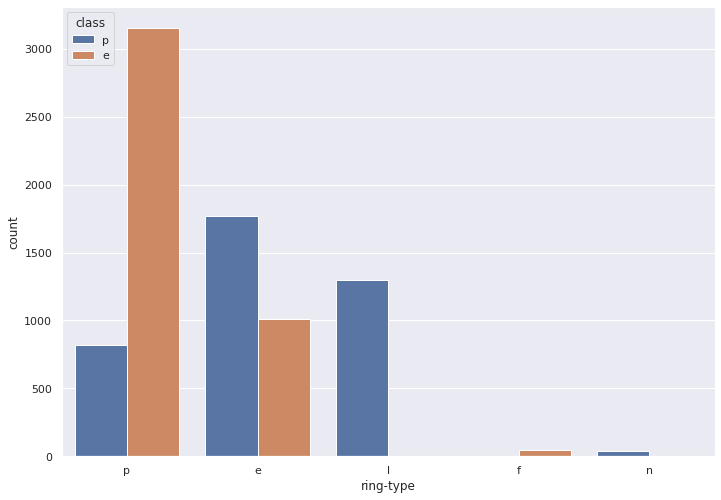

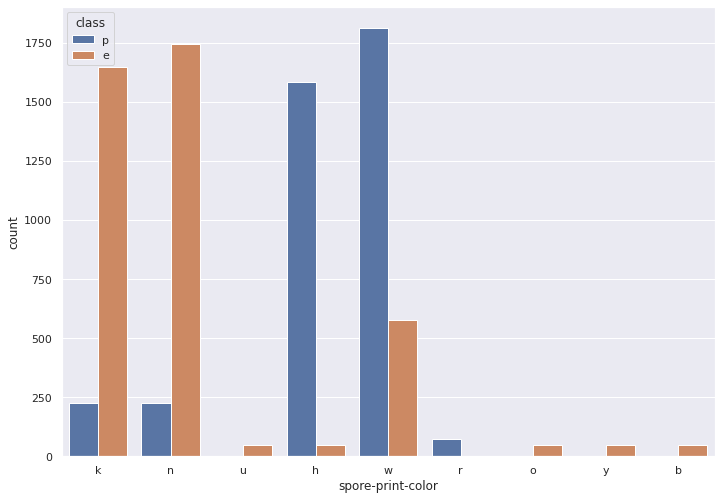

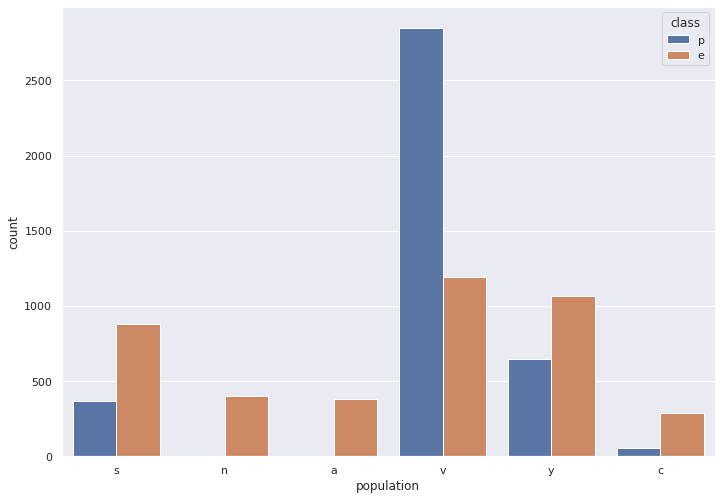

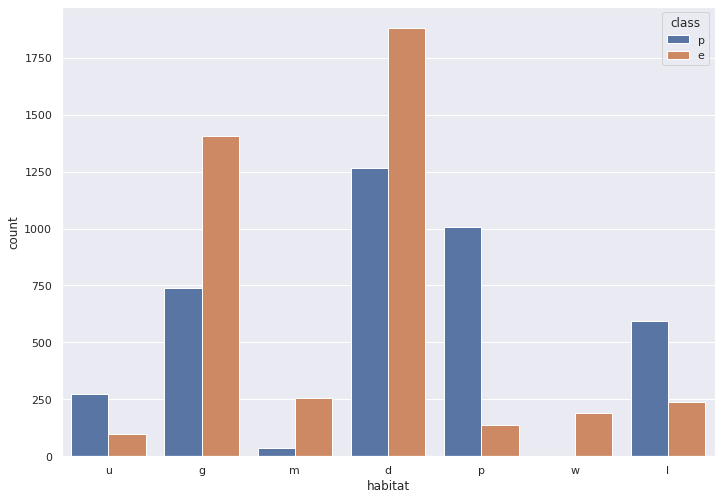

In [14]:
hue = data['class']
data_for_plot = data.drop('class', axis=1)

plot_data(hue, data_for_plot)

#### 3. Checking if we have any missing values.

In [15]:
for col in data.columns:
  print("{} : {}".format(col, data[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


* As we can see there is no missing value in this dataset , lucky us.

#Model Building

* As we can see the <b>variables</b> are <b>categorical</b> in nature so we need to convert them into some format which the machine could understand.we will use <b>one-hot-encoding</b> and/or <b>label encoding</b> to perform that.



In [16]:
le = LabelEncoder()

data['class']= le.fit_transform(data['class'])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


We have converted the target variable <b>class</b> in (1 , 0 ) using label encoding.


poisonous  : 1
 
edible     : 0

In [17]:
encoded_data = pd.get_dummies(data)

encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


* Train/test split

In [19]:
from sklearn.model_selection import train_test_split

y = data['class'].values.reshape(-1,1)
X = encoded_data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [20]:
encoded_data.columns

Index(['class', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=118)

#Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [22]:
logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_prob = logistic_reg.predict_proba(X_test)[:,1]

y_pred = np.where(y_prob > 0.5,1,0)

In [25]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

confusion_matrix

array([[843,   0],
       [  0, 782]])

In [27]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)

auc_roc

1.0

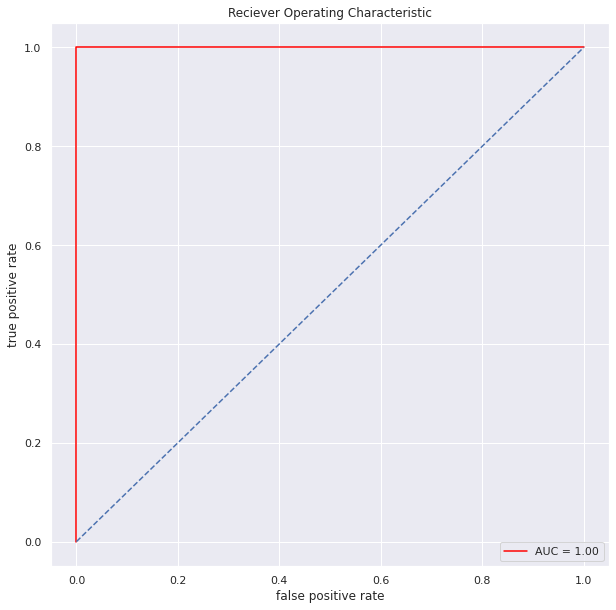

In [28]:
from sklearn.metrics import roc_curve, auc


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

def plot_roc(roc_auc):
  plt.figure(figsize=(10,10))
  plt.title('Reciever Operating Characteristic')
  plt.plot(false_positive_rate, true_positive_rate, color = 'red', label='AUC = %.2f' % roc_auc)
  plt.legend(loc ='lower right')
  plt.plot([0,1],[0,1], linestyle='--')
  plt.axis('tight')
  plt.ylabel('true positive rate')
  plt.xlabel('false positive rate')

plot_roc(roc_auc)



#Classifier with LDA

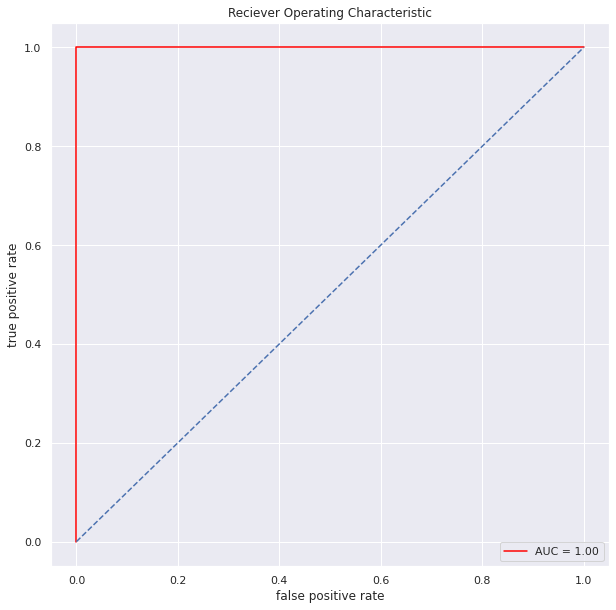

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#making the instance of the model

lda = LinearDiscriminantAnalysis()

#fit the model on training set
lda.fit(X_train, y_train.ravel())

#Making predictions
y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob_lda >.5,1,0)

#print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lda)
confusion_matrix

#plot the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate,true_positive_rate)
roc_auc_lda

plot_roc(roc_auc_lda)


#Classifier with QDA


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


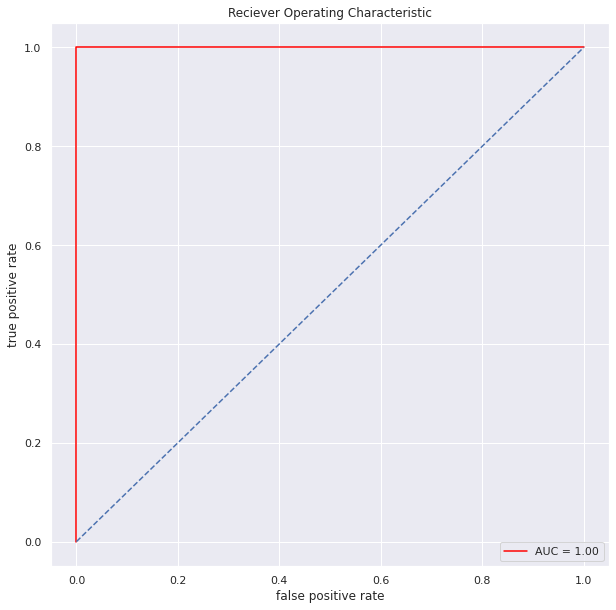

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#making the instance of the model

qda = QuadraticDiscriminantAnalysis()

#fit the model on training set
qda.fit(X_train, y_train.ravel())

#Making predictions
y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob_qda >.5,1,0)

#print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_qda)
confusion_matrix

#plot the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate,true_positive_rate)
roc_auc_qda

plot_roc(roc_auc_qda)


#Concluding Remarks:

As we can see in Logistic Regression, LDA and QDA for Classification we get the prefect result as which is not the case in real life.

The area under the curve AUC is perfect 1(Not the reality).
